In [1]:
using NamedTrajectories
using QuantumCollocation
using LinearAlgebra
using SparseArrays
using JLD2

In [12]:
data_path = "newresults/T_500_Q_200.0_Δt_0.4_a_bound_0.25132741228718347_dda_bound_0.05dt_min_0.2_dt_max_0.4_max_iter_200_00000.jld2"
plot_path = "newplots/T_500_Q_200.0_Δt_0.4_a_bound_0.25132741228718347_dda_bound_0.05dt_min_0.2_dt_max_0.4_max_iter_200_00000.png"

"newplots/T_500_Q_200.0_Δt_0.4_a_bound_0.25132741228718347_dda_bound_0.05dt_min_0.2_dt_max_0.4_max_iter_200_00000.png"

In [3]:
data = load_problem(data_path; return_data=true)

Loading data dict from newresults/T_500_Q_200.0_Δt_0.4_a_bound_0.25132741228718347_dda_bound_0.05dt_min_0.2_dt_max_0.4_max_iter_200_00000.jld2:

   fidelity = 0.9998070299870443
   pulse duration = 192.79106131331076


Dict{String, Any} with 7 entries:
  "options"        => Options{Float64}(1.0e-8, 100.0, 200, 1.0e6, 1.0, 1.0e-6, …
  "integrators"    => AbstractIntegrator[UnitaryPadeIntegrator{Float64}(sparse(…
  "fidelity"       => 0.999807
  "params"         => Dict{Symbol, Any}(:eval_hessian=>true, :objective_terms=>…
  "system"         => QuantumSystem{Float64}([0.0 0.0 … 0.0 0.0; 0.0 -0.376991 …
  "trajectory"     => NamedTrajectory{Float64}([1.0 1.0 … 0.999785 0.999955; 0.…
  "pulse duration" => 192.791

In [6]:
traj = data["trajectory"]
system = data["system"]
params = data["params"]

Dict{Symbol, Any} with 5 entries:
  :eval_hessian          => true
  :objective_terms       => Dict[Dict{Symbol, Any}(:eval_hessian=>true, :type=>…
  :linear_constraints    => LinearConstraint[EqualityConstraint([1], [1, 2, 3, …
  :options               => Options{Float64}(1.0e-8, 100.0, 200, 1.0e6, 1.0, 1.…
  :nonlinear_constraints => Any[]

In [13]:
plot(plot_path, traj, [:Ũ⃗, :a]; ignored_labels=[:Ũ⃗])

CairoMakie.Screen{IMAGE}


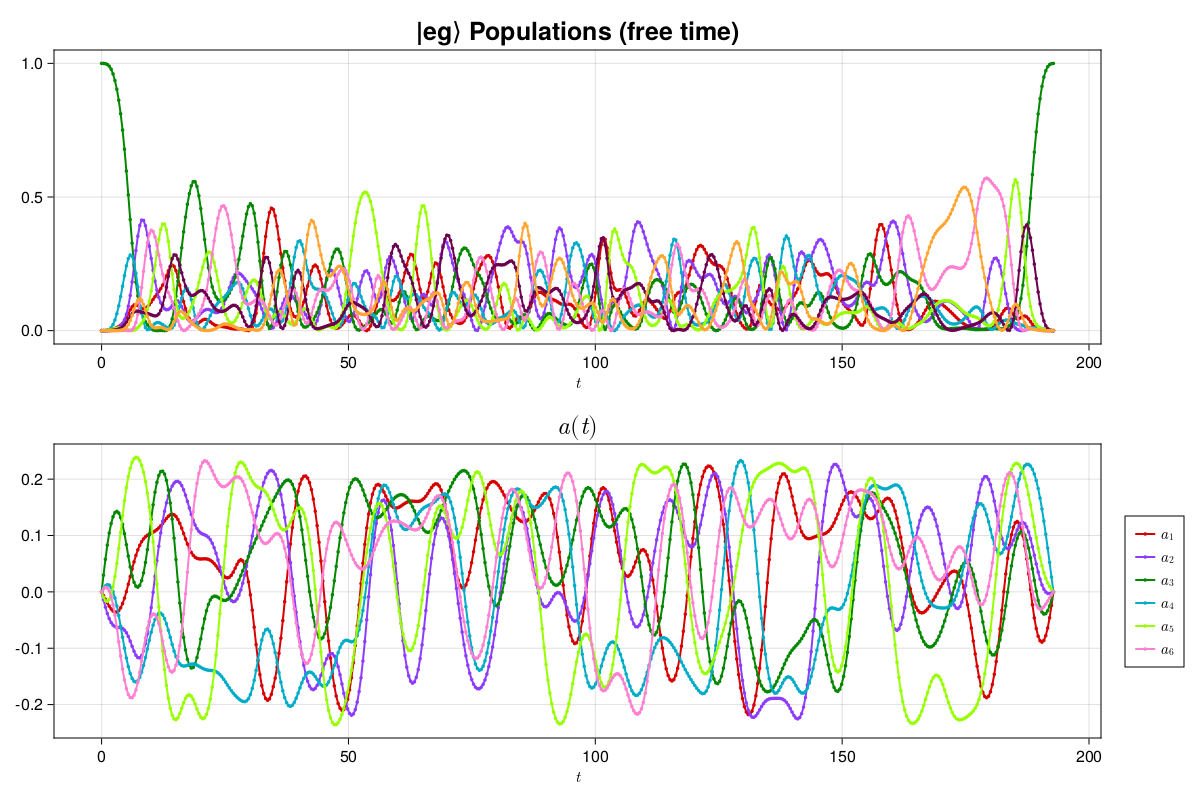

In [10]:
transformation = OrderedDict(
   :Ũ⃗ => [x -> populations(iso_vec_to_operator(x)[:, 3])]
)
titles = OrderedDict(:Ũ⃗ => ["|eg⟩ Populations (free time)"])
plot(traj, [:a]; transformations=transformation, transformation_titles=titles, ignored_labels=[:Ũ⃗])